In [1]:
#Import the data for the temperature in the city of Madrid.
# Source: https://www.ncei.noaa.gov/cdo-web/ 
import pandas as pd
import matplotlib.pyplot as plt

# Import the Excel file and parse the "Date" column as datetime,
# setting it as the index.
data = pd.read_csv("Precipitation-data.csv", index_col="DATE", parse_dates=["DATE"])

In [2]:
#Select only the last two years of data to be abe to capture the trend and/or the seasonality
# As it is daily data we take into consideration the last 730 days

data_subset  =data.iloc[-730:,:]
data_subset.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,
2023-11-01,SPE00120278,"MADRID BARAJAS, SP",40.4667,-3.5556,609.0,1.4,",,E",NaN,NaN,11.9,"H,,S",15.9,",,E",6.3,",,E"
2023-11-02,SPE00120278,"MADRID BARAJAS, SP",40.4667,-3.5556,609.0,7.5,",,E",NaN,NaN,13.0,"H,,S",17.1,",,E",8.1,",,E"
2023-11-03,SPE00120278,"MADRID BARAJAS, SP",40.4667,-3.5556,609.0,0.1,",,E",NaN,NaN,10.7,"H,,S",14.9,",,E",7.5,",,E"
2023-11-04,SPE00120278,"MADRID BARAJAS, SP",40.4667,-3.5556,609.0,1.1,",,E",NaN,NaN,12.3,"H,,S",15.3,",,E",10.1,",,E"
2023-11-05,SPE00120278,"MADRID BARAJAS, SP",40.4667,-3.5556,609.0,0.0,",,E",NaN,NaN,11.3,"H,,S",14.9,",,E",9.0,",,E"


In [ ]:
#Identify how many None values do we have in the two years of data tht we selected for the analysis
data_subset.info()
#The results show that in the column of interest, that is the TAVG: average temperarature,
# we have 78 days where we don't have the information for of the temperature

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-11-01 to 2025-10-30
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          730 non-null    object 
 1   NAME             730 non-null    object 
 2   LATITUDE         730 non-null    float64
 3   LONGITUDE        730 non-null    float64
 4   ELEVATION        730 non-null    float64
 5   PRCP             667 non-null    float64
 6   PRCP_ATTRIBUTES  667 non-null    object 
 7   SNWD             0 non-null      float64
 8   SNWD_ATTRIBUTES  0 non-null      object 
 9   TAVG             652 non-null    float64
 10  TAVG_ATTRIBUTES  652 non-null    object 
 11  TMAX             729 non-null    float64
 12  TMAX_ATTRIBUTES  729 non-null    object 
 13  TMIN             730 non-null    float64
 14  TMIN_ATTRIBUTES  730 non-null    object 
dtypes: float64(8), object(7)
memory usage: 91.2+ KB


In [4]:
# None values treatment:
# In order to solve the issues of the null values and considering the seasonality of the data, we consider that the best method
# to fill in the null value is by interpolation taking the nearest no null value. In that way we can avoid biases or any negative influence of those 
# inputed values when fitting a model. 

data_subset = data_subset.interpolate(method='nearest')

C:\Users\ricar\AppData\Local\Temp\ipykernel_15832\689851252.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_subset = data_subset.interpolate(method='nearest')


In [5]:
#Verification that there are not more null values in our variable of interest
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-11-01 to 2025-10-30
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          730 non-null    object 
 1   NAME             730 non-null    object 
 2   LATITUDE         730 non-null    float64
 3   LONGITUDE        730 non-null    float64
 4   ELEVATION        730 non-null    float64
 5   PRCP             730 non-null    float64
 6   PRCP_ATTRIBUTES  667 non-null    object 
 7   SNWD             0 non-null      float64
 8   SNWD_ATTRIBUTES  0 non-null      object 
 9   TAVG             663 non-null    float64
 10  TAVG_ATTRIBUTES  652 non-null    object 
 11  TMAX             730 non-null    float64
 12  TMAX_ATTRIBUTES  729 non-null    object 
 13  TMIN             730 non-null    float64
 14  TMIN_ATTRIBUTES  730 non-null    object 
dtypes: float64(8), object(7)
memory usage: 91.2+ KB


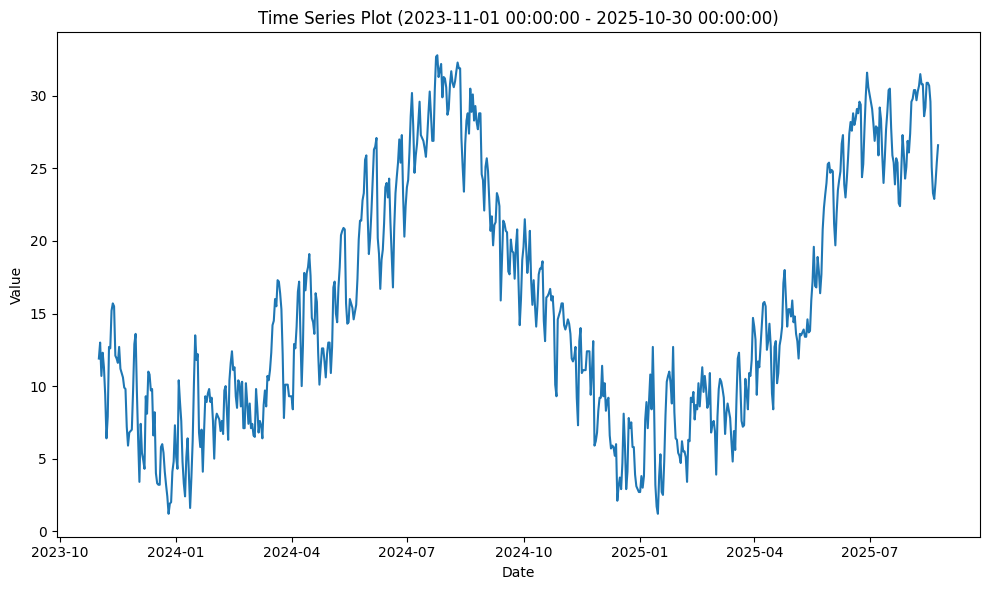

In [ ]:

# Plot the time series of the average temperature in Madrid over the course of the last two years

plt.figure(figsize=(10, 6))
plt.plot(data_subset.index, data_subset['TAVG'], linestyle='-')
plt.title(f"Time Series Plot ({list(data_subset.index)[0]} - {list(data_subset.index)[-1]})")
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

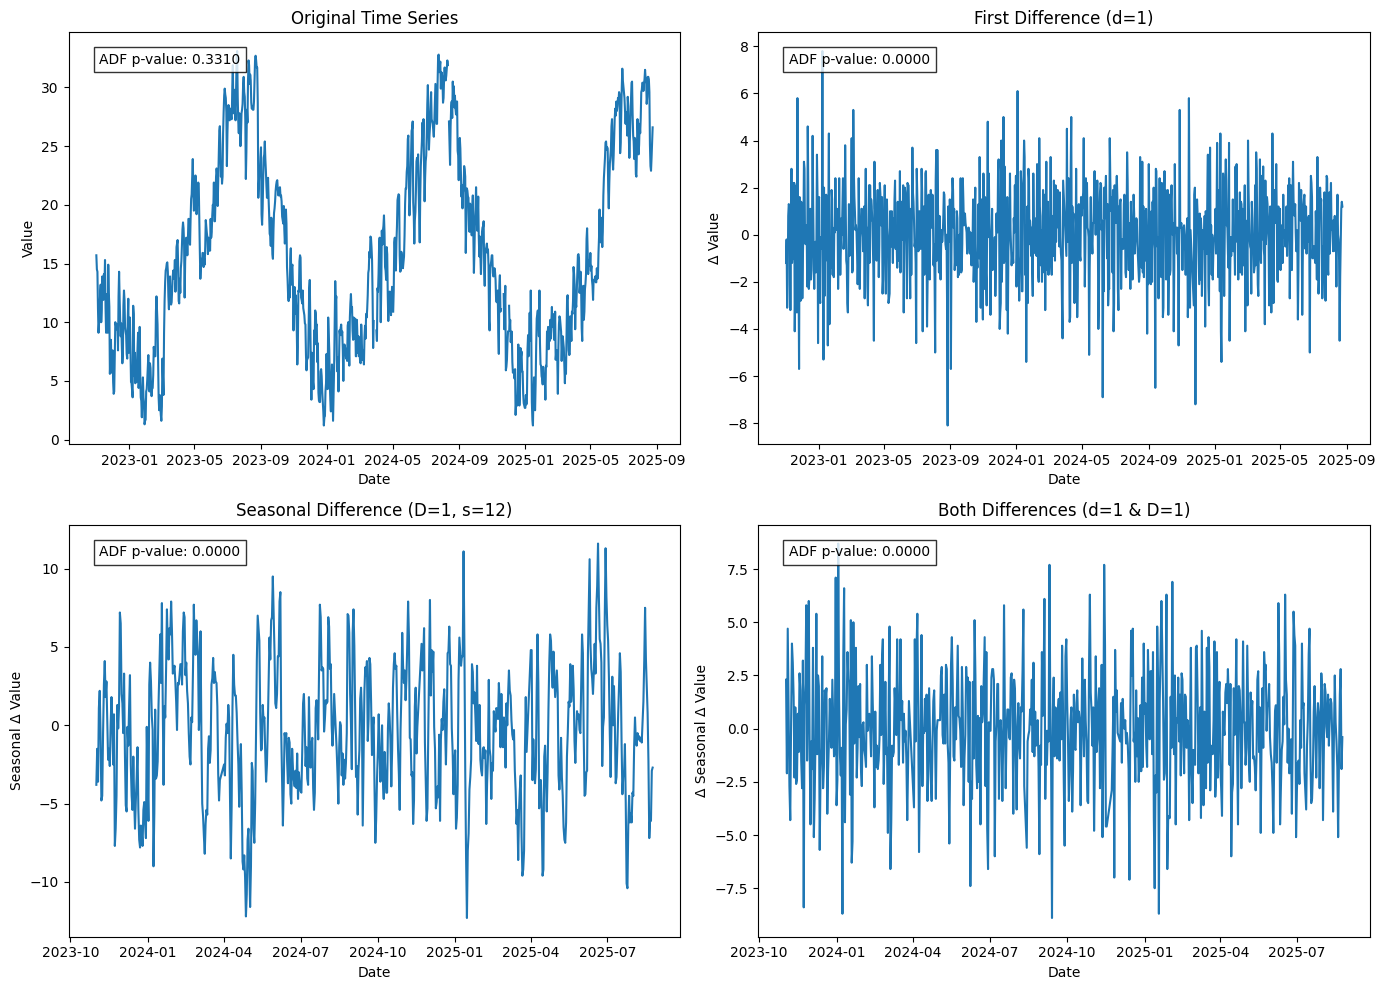

In [22]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assume the time series values are in the first column
series = data_subset['TAVG']

# Compute the first (non-seasonal) difference
diff_series = series.diff().dropna()

# For monthly data, seasonal difference is typically with period 12.
seasonal_diff = series.diff(365).dropna()

# Both differences: apply first difference then seasonal difference
both_diff = diff_series.diff(365).dropna()

# Compute ADF test p-values for each series
adf_original = adfuller(series.dropna())
p_value_original = adf_original[1]

adf_diff = adfuller(diff_series)
p_value_diff = adf_diff[1]

adf_seasonal = adfuller(seasonal_diff)
p_value_seasonal = adf_seasonal[1]

adf_both = adfuller(both_diff)
p_value_both = adf_both[1]

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Top-Left: Original time series with ADF p-value annotation
axs[0, 0].plot(series, linestyle='-')
axs[0, 0].set_title("Original Time Series")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Value")
axs[0, 0].text(0.05, 0.95, f"ADF p-value: {p_value_original:.4f}",
               transform=axs[0, 0].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

# Top-Right: First Difference (non-seasonal) with ADF p-value annotation
axs[0, 1].plot(diff_series, linestyle='-')
axs[0, 1].set_title("First Difference (d=1)")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Δ Value")
axs[0, 1].text(0.05, 0.95, f"ADF p-value: {p_value_diff:.4f}",
               transform=axs[0, 1].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

# Bottom-Left: Seasonal Difference (assumed seasonal period s=12) with ADF p-value annotation
axs[1, 0].plot(seasonal_diff, linestyle='-')
axs[1, 0].set_title("Seasonal Difference (D=1, s=12)")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("Seasonal Δ Value")
axs[1, 0].text(0.05, 0.95, f"ADF p-value: {p_value_seasonal:.4f}",
               transform=axs[1, 0].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

# Bottom-Right: Both Differences (non-seasonal then seasonal) with ADF p-value annotation
axs[1, 1].plot(both_diff,  linestyle='-')
axs[1, 1].set_title("Both Differences (d=1 & D=1)")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Δ Seasonal Δ Value")
axs[1, 1].text(0.05, 0.95, f"ADF p-value: {p_value_both:.4f}",
               transform=axs[1, 1].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
